### <center>Task 2: Predict Future Stock Prices</center>
---


In [2]:
# Import required libraries
# yfinance to download stock data
# sklearn for ML modeling
# matplotlib for plotting results
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'yfinance'

---

In [ ]:
# Download Apple's stock data (AAPL) from Yahoo Finance
# Data includes Open, High, Low, Close, and Volume
data = yf.download("AAPL", start="2022-01-01", end="2024-12-31")
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

C:\Users\HP\AppData\Local\Temp\ipykernel_5688\389518178.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2022-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


---

In [ ]:
# Create a new column 'Target' which is the next day's closing price
# This will be our prediction target
data['Target'] = data['Close'].shift(-1)

# Remove the last row as it has no target value
data.dropna(inplace=True)

---

In [ ]:
# Define features (input variables) and target (output variable)
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Target']

---

In [ ]:
# Split the dataset into training and testing sets
# 80% for training, 20% for testing, no shuffle to preserve time sequence
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

---

In [ ]:
# Initialize and train the Random Forest Regressor
# A Random Forest is an ensemble of decision trees
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

---

In [ ]:
# Use the trained model to make predictions on the test set
predicted = model.predict(X_test)

---

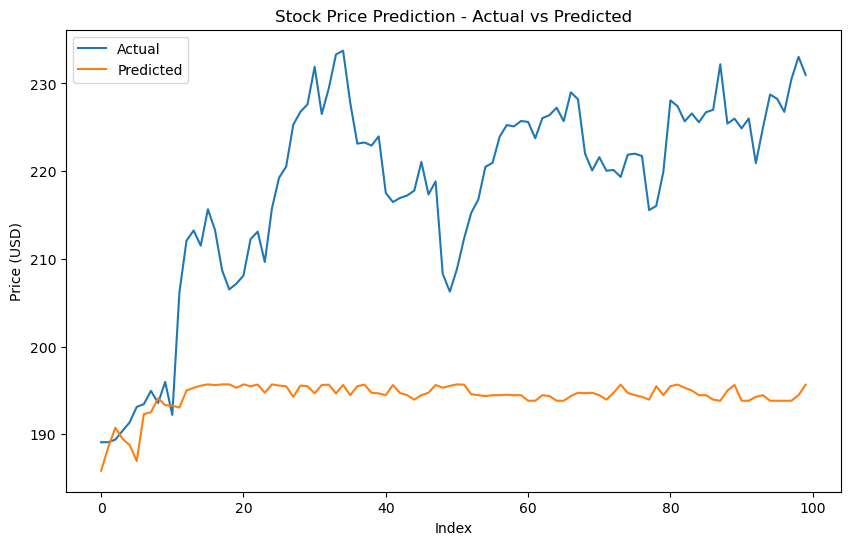

In [ ]:
# Plot actual vs predicted stock prices to evaluate performance visually
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual')     # Plot first 100 actual values
plt.plot(predicted[:100], label='Predicted')      # Plot first 100 predicted values
plt.legend()
plt.title("Stock Price Prediction - Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Price (USD)")
plt.show()

---